###### 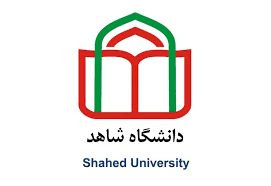

## Course: Artificial Neural Networks
#### Course Instructor: Professor Ali Moti Nasrabadi
#### Teaching Assistant: Hossein Pakdaman Moghaddam

# Python Regular Expressions 

Regular expressions are a powerful language for matching text patterns. This page gives a basic introduction to regular expressions themselves sufficient for our Python exercises and shows how regular expressions work in Python. The Python "re" module provides regular expression support.

In Python a regular expression search is typically written as:

The re.search() method takes a regular expression pattern and a string and searches for that pattern within the string. If the search is successful, search() returns a match object or None otherwise. Therefore, the search is usually immediately followed by an if-statement to test if the search succeeded, as shown in the following example which searches for the pattern 'word:' followed by a 3 letter word (details below):

In [8]:
import re

str = 'an example word:cat!!'
match = re.search(r'word:\w\w\w', str)
# If-statement after search() tests if it succeeded
if match:
  print('found', match.group()) ## 'found word:cat'
else:
  print('did not find')

found word:cat


The code match = re.search(pat, str) stores the search result in a variable named "match". Then the if-statement tests the match -- if true the search succeeded and match.group() is the matching text (e.g. 'word:cat'). Otherwise if the match is false (None to be more specific), then the search did not succeed, and there is no matching text.

The 'r' at the start of the pattern string designates a python "raw" string which passes through backslashes without change which is very handy for regular expressions (Java needs this feature badly!). I recommend that you always write pattern strings with the 'r' just as a habit.

## Basic Patterns
The power of regular expressions is that they can specify patterns, not just fixed characters. Here are the most basic patterns which match single chars:

* a, X, 9, < -- ordinary characters just match themselves exactly. The meta-characters which do not match themselves because they have special meanings are: . ^ $ * + ? { [ ] \ | ( ) (details below)
  
* . (a period) -- matches any single character except newline '\n'
  
* \w -- (lowercase w) matches a "word" character: a letter or digit or underbar [a-zA-Z0-9_]. Note that although "word" is the mnemonic for this, it only matches a single word char, not a whole word. \W (upper case W) matches any non-word character.

* \b -- boundary between word and non-word
  
* \s -- (lowercase s) matches a single whitespace character -- space, newline, return, tab, form [ \n\r\t\f]. \S (upper case S) matches any non-whitespace character.
  
* \t, \n, \r -- tab, newline, return
  
* \d -- decimal digit [0-9] (some older regex utilities do not support \d, but they all support \w and \s)

* ^ = start, $ = end -- match the start or end of the string

* \ -- inhibit the "specialness" of a character. So, for example, use \. to match a period or \\ to match a slash. If you are unsure if a character has special meaning, such as '@', you can try putting a slash in front of it, \@. If its not a valid escape sequence, like \c, your python program will halt with an error.

## Basic Examples
Joke: what do you call a pig with three eyes? piiig!😂

The basic rules of regular expression search for a pattern within a string are:

* The search proceeds through the string from start to end, stopping at the first match found
* All of the pattern must be matched, but not all of the string
* If match = re.search(pat, str) is successful, match is not None and in particular match.group() is the matching text

In [16]:
## Search for pattern 'iii' in string 'piiig'.
## All of the pattern must match, but it may appear anywhere.
## On success, match.group() is matched text.
match = re.search(r'iii', 'piiig') # found, match.group() == "iii"
print(match)

<re.Match object; span=(1, 4), match='iii'>


In [17]:
match = re.search(r'igs', 'piiig') # not found, match == None
print(match)

None


In [18]:
## . = any char but \n
match = re.search(r'..g', 'piiig') # found, match.group() == "iig"
print(match)

<re.Match object; span=(2, 5), match='iig'>


In [19]:
## \d = digit char, \w = word char
match = re.search(r'\d\d\d', 'p123g') # found, match.group() == "123"
print(match)

<re.Match object; span=(1, 4), match='123'>


In [21]:
match = re.search(r'\w\w\w', '@@abcd!!') # found, match.group() == "abc"
print(match)

<re.Match object; span=(2, 5), match='abc'>


## Repetition
Things get more interesting when you use + and * to specify repetition in the pattern

* ---   + -- 1 or more occurrences of the pattern to its left, e.g. 'i+' = one or more i's
* ---   * -- 0 or more occurrences of the pattern to its left
* ---   ? -- match 0 or 1 occurrences of the pattern to its left

## Leftmost & Largest
First the search finds the leftmost match for the pattern, and second it tries to use up as much of the string as possible -- i.e. + and * go as far as possible (the + and * are said to be "greedy").

# Repetition Examples

In [22]:
## i+ = one or more i's, as many as possible.
match = re.search(r'pi+', 'piiig') # found, match.group() == "piii"
print(match)

<re.Match object; span=(0, 4), match='piii'>


In [24]:
## Finds the first/leftmost solution, and within it drives the +
## as far as possible (aka 'leftmost and largest').
## In this example, note that it does not get to the second set of i's.
match = re.search(r'i+', 'piigiiii') # found, match.group() == "ii"
print(match)

<re.Match object; span=(1, 3), match='ii'>


In [25]:
## \s* = zero or more whitespace chars
## Here look for 3 digits, possibly separated by whitespace.
match = re.search(r'\d\s*\d\s*\d', 'xx1 2   3xx') # found, match.group() == "1 2   3"
print(match)

<re.Match object; span=(2, 9), match='1 2   3'>


In [26]:
match = re.search(r'\d\s*\d\s*\d', 'xx12  3xx') # found, match.group() == "12  3"
print(match)

<re.Match object; span=(2, 7), match='12  3'>


In [27]:
match = re.search(r'\d\s*\d\s*\d', 'xx123xx') # found, match.group() == "123"
print(match)

<re.Match object; span=(2, 5), match='123'>


In [28]:
## ^ = matches the start of string, so this fails:
match = re.search(r'^b\w+', 'foobar') # not found, match == None
print(match)

None


In [29]:
## but without the ^ it succeeds:
match = re.search(r'b\w+', 'foobar') # found, match.group() == "bar"
print(match)

<re.Match object; span=(3, 6), match='bar'>


## Emails Example
Suppose you want to find the email address inside the string 'xyz alice-b@google.com purple monkey'. We'll use this as a running example to demonstrate more regular expression features. Here's an attempt using the pattern r'\w+@\w+':

In [31]:
str = 'purple alice-b@google.com monkey dishwasher'
match = re.search(r'\w+@\w+', str)
if match:
 print(match.group())

b@google


The search does not get the whole email address in this case because the \w does not match the '-' or '.' in the address. We'll fix this using the regular expression features below.

## Square Brackets
Square brackets can be used to indicate a set of chars, so [abc] matches 'a' or 'b' or 'c'. The codes \w, \s etc. work inside square brackets too with the one exception that dot (.) just means a literal dot. For the emails problem, the square brackets are an easy way to add '.' and '-' to the set of chars which can appear around the @ with the pattern r'[\w.-]+@[\w.-]+' to get the whole email address:

In [32]:
match = re.search(r'[\w.-]+@[\w.-]+', str)
if match:
 print(match.group())  ## 'alice-b@google.com'

alice-b@google.com


(More square-bracket features) You can also use a dash to indicate a range, so [a-z] matches all lowercase letters. To use a dash without indicating a range, put the dash last, e.g. [abc-]. An up-hat (^) at the start of a square-bracket set inverts it, so [^ab] means any char except 'a' or 'b'.

## Group Extraction
The "group" feature of a regular expression allows you to pick out parts of the matching text. Suppose for the emails problem that we want to extract the username and host separately. To do this, add parentheses ( ) around the username and host in the pattern, like this: r'([\w.-]+)@([\w.-]+)'. In this case, the parentheses do not change what the pattern will match, instead they establish logical "groups" inside of the match text. On a successful search, match.group(1) is the match text corresponding to the 1st left parentheses, and match.group(2) is the text corresponding to the 2nd left parentheses. The plain match.group() is still the whole match text as usual.

In [34]:
str = 'purple alice-b@google.com monkey dishwasher'
match = re.search(r'([\w.-]+)@([\w.-]+)', str)
if match:
 print(match.group())   ## 'alice-b@google.com' (the whole match)
 print(match.group(1))  ## 'alice-b' (the username, group 1)
 print(match.group(2))  ## 'google.com' (the host, group 2)

alice-b@google.com
alice-b
google.com


A common workflow with regular expressions is that you write a pattern for the thing you are looking for, adding parentheses groups to extract the parts you want.

## findall
findall() is probably the single most powerful function in the re module. Above we used re.search() to find the first match for a pattern. findall() finds *all* the matches and returns them as a list of strings, with each string representing one match.

In [35]:
## Suppose we have a text with many email addresses
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'

## Here re.findall() returns a list of all the found email strings
emails = re.findall(r'[\w\.-]+@[\w\.-]+', str) ## ['alice@google.com', 'bob@abc.com']
for email in emails:
# do something with each found email string
 print(email)

alice@google.com
bob@abc.com


## findall With Files
For files, you may be in the habit of writing a loop to iterate over the lines of the file, and you could then call findall() on each line. Instead, let findall() do the iteration for you -- much better! Just feed the whole file text into findall() and let it return a list of all the matches in a single step (recall that f.read() returns the whole text of a file in a single string):

## findall and Groups
The parentheses ( ) group mechanism can be combined with findall(). If the pattern includes 2 or more parentheses groups, then instead of returning a list of strings, findall() returns a list of *tuples*. Each tuple represents one match of the pattern, and inside the tuple is the group(1), group(2) .. data. So if 2 parentheses groups are added to the email pattern, then findall() returns a list of tuples, each length 2 containing the username and host, e.g. ('alice', 'google.com').

In [37]:
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
tuples = re.findall(r'([\w\.-]+)@([\w\.-]+)', str)
print(tuples)  ## [('alice', 'google.com'), ('bob', 'abc.com')]
for tuple in tuples:
 print(tuple[0])  ## username
 print(tuple[1])  ## host

[('alice', 'google.com'), ('bob', 'abc.com')]
alice
google.com
bob
abc.com


Once you have the list of tuples, you can loop over it to do some computation for each tuple. If the pattern includes no parentheses, then findall() returns a list of found strings as in earlier examples. If the pattern includes a single set of parentheses, then findall() returns a list of strings corresponding to that single group. (Obscure optional feature: Sometimes you have paren ( ) groupings in the pattern, but which you do not want to extract. In that case, write the parens with a ?: at the start, e.g. (?: ) and that left paren will not count as a group result.)

## RE Workflow and Debug
Regular expression patterns pack a lot of meaning into just a few characters , but they are so dense, you can spend a lot of time debugging your patterns. Set up your runtime so you can run a pattern and print what it matches easily, for example by running it on a small test text and printing the result of findall(). If the pattern matches nothing, try weakening the pattern, removing parts of it so you get too many matches. When it's matching nothing, you can't make any progress since there's nothing concrete to look at. Once it's matching too much, then you can work on tightening it up incrementally to hit just what you want.

## Options
The re functions take options to modify the behavior of the pattern match. The option flag is added as an extra argument to the search() or findall() etc., e.g. re.search(pat, str, re.IGNORECASE).

* IGNORECASE -- ignore upper/lowercase differences for matching, so 'a' matches both 'a' and 'A'.
* DOTALL -- allow dot (.) to match newline -- normally it matches anything but newline. This can trip you up -- you think .* matches everything, but by default it does not go past the end of a line. Note that \s (whitespace) includes newlines, so if you want to match a run of whitespace that may include a newline, you can just use \s*
* MULTILINE -- Within a string made of many lines, allow ^ and $ to match the start and end of each line. Normally ^/$ would just match the start and end of the whole string.

## Greedy vs. Non-Greedy (optional)
This is optional section which shows a more advanced regular expression technique not needed for the exercises.

Suppose you have text with tags in it: <b>foo</b> and <i>so on</i>

Suppose you are trying to match each tag with the pattern '(<.*>)' -- what does it match first?

The result is a little surprising, but the greedy aspect of the .* causes it to match the whole '<b>foo</b> and <i>so on</i>' as one big match. The problem is that the .* goes as far as is it can, instead of stopping at the first > (aka it is "greedy").

There is an extension to regular expression where you add a ? at the end, such as .*? or .+?, changing them to be non-greedy. Now they stop as soon as they can. So the pattern '(<.*?>)' will get just '<b>' as the first match, and '</b>' as the second match, and so on getting each <..> pair in turn. The style is typically that you use a .*? immediately followed by some concrete marker (> in this case) to which the .*? run is forced to extend.

The *? extension originated in Perl, and regular expressions that include Perl's extensions are known as Perl Compatible Regular Expressions -- pcre. Python includes pcre support. Many command line utils etc. have a flag where they accept pcre patterns.

An older but widely used technique to code this idea of "all of these chars except stopping at X" uses the square-bracket style. For the above you could write the pattern, but instead of .* to get all the chars, use [^>]* which skips over all characters which are not > (the leading ^ "inverts" the square bracket set, so it matches any char not in the brackets).

## Substitution (optional)
The re.sub(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them. The replacement string can include '\1', '\2' which refer to the text from group(1), group(2), and so on from the original matching text.

Here's an example which searches for all the email addresses, and changes them to keep the user (\1) but have yo-yo-dyne.com as the host.

In [38]:
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
## re.sub(pat, replacement, str) -- returns new string with all replacements,
## \1 is group(1), \2 group(2) in the replacement
print(re.sub(r'([\w\.-]+)@([\w\.-]+)', r'\1@yo-yo-dyne.com', str))
## purple alice@yo-yo-dyne.com, blah monkey bob@yo-yo-dyne.com blah dishwasher

purple alice@yo-yo-dyne.com, blah monkey bob@yo-yo-dyne.com blah dishwasher
